In [1]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pandas as pd
from IPython.display import HTML
from collections import deque
import importlib
import seaborn as sns #remove
sns.set()
sns.set(style="whitegrid")


%load_ext autoreload
%autoreload 2

In [2]:
import simulation
import controller
from simulation import *
from genetic_utils import *
from dqn_main_bus import DQNMainBus
from main_bus import MainBus
from genetic_main_bus import GeneticMainBus

Using TensorFlow backend.


In [3]:
whole_day = 1440

In [4]:
def get_results(simulation):
    num_del = simulation.controller.num_passengers_delivered
    expenses = simulation.controller.get_total_cost()
    cost_ratio = expenses/num_del
    num_messages = simulation.controller.get_messages_sent()
    awt = (simulation.controller.total_waiting_time ) / \
        (simulation.controller.num_passengers_delivered + simulation.controller.actual_passenger_count)
    return awt, expenses, num_messages, num_del, cost_ratio

# Initialization of Genetic Bus

In [ ]:
simulation = Simulation(GeneticMainBus)
initial_genomes = [[1, 0.5, 0.5, 0.5, 0.5, 0.05], [2, 0.5, 0.5, 0.5, 0.5, 0.08], [3, 0.5, 0.5, 0.5, 0.5, 0.1]]
genome_distro = [0.30, 0.35, 0.35]

Initializing Prob Dist


First day iteration

In [ ]:
simulation.reset(bus_genomes=initial_genomes, genome_distro=genome_distro)
simulation.execute(iterations=whole_day, animate=False)

 436 / 1440 

Initial Results

In [ ]:
awt, expenses, num_messages, num_del, cost_ratio = get_results(simulation)

print('\n\tDelivered: {}'.format(num_del))
print('\tExpenses: {}'.format(expenses))
print('\tExpenses/Pass Del: {}'.format(cost_ratio))
print('\tMessages: {}'.format(num_messages))
print('\tAWT: {}'.format(awt))

bus_fitness = np.array([bus.cum_reward / MainBus._bus_type_travel_cost[bus.bus_type] for bus in simulation.controller.buses.values() ])
bus_genomes = np.array([bus.genome for bus in simulation.controller.buses.values() ])
init_genomes = np.array([bus.genome for bus in simulation.controller.buses.values() ])

best_perf = awt
best_fitness = bus_fitness
best_genomes = bus_genomes

awt_over_time = [awt]
expenses_over_time = [expenses]
messages_over_time = [num_messages]
delivered_over_time = [num_del]
cost_ratio_over_time = [cost_ratio]

Evolutionary algorithm run

In [15]:
n_iterations = 25

# Evolution
for _ in range(n_iterations):
    
    # Evolution step
    (new_genomes, new_distro) = create_new_population(bus_genomes, bus_fitness, 0.7, 0.2, 0.1)
    
    # Evaluation
    simulation.reset(bus_genomes = new_genomes, genome_distro= new_distro)
    
    simulation.execute(iterations=whole_day, animate=False)
    
    # Get population stats
    bus_fitness = np.array([bus.cum_reward / MainBus._bus_type_travel_cost[bus.bus_type] for bus in simulation.controller.buses.values() ])
    bus_genomes = np.array([bus.genome for bus in simulation.controller.buses.values() ])

    # Display and save results
    awt, expenses, num_messages, num_del, cost_ratio = get_results(simulation)
    
    awt_over_time.append(awt)
    expenses_over_time.append(expenses)
    messages_over_time.append(num_messages)
    delivered_over_time.append(num_del)
    cost_ratio_over_time.append(cost_ratio)
    
    print('\n\tDelivered: {}'.format(num_del))
    print('\tExpenses: {}'.format(expenses))
    print('\tExpenses/Pass Del: {}'.format(cost_ratio))
    print('\tMessages: {}'.format(num_messages))
    print('\tAWT: {}'.format(awt))
    
    if awt < best_perf:
        best_perf = awt
        best_fitness = bus_fitness
        best_genomes = bus_genomes

 1440 / 1440 
	Delivered: 41858
	Expenses: 1146419
	Expenses/Pass Del: 27.388288977017535
	Messages: 26767
	AWT: 90.24571236408474
 1440 / 1440 
	Delivered: 42356
	Expenses: 1082549
	Expenses/Pass Del: 25.55833884219473
	Messages: 27239
	AWT: 84.9454097074319
 1440 / 1440 
	Delivered: 42245
	Expenses: 1089134
	Expenses/Pass Del: 25.781370576399574
	Messages: 26402
	AWT: 90.1434368344356
 1440 / 1440 
	Delivered: 40503
	Expenses: 1482869
	Expenses/Pass Del: 36.61133743179518
	Messages: 26812
	AWT: 111.71608564062325
 1440 / 1440 
	Delivered: 42029
	Expenses: 1120679
	Expenses/Pass Del: 26.664422184682007
	Messages: 27093
	AWT: 85.29440645667526
 1440 / 1440 
	Delivered: 41696
	Expenses: 1200959
	Expenses/Pass Del: 28.80273887183423
	Messages: 27355
	AWT: 97.90866494787579
 1440 / 1440 
	Delivered: 41242
	Expenses: 1330394
	Expenses/Pass Del: 32.258231899519906
	Messages: 28313
	AWT: 99.35850241004371
 397 / 1440 

KeyboardInterrupt: 

print the genome distribution after the simulation

85.74514067929604


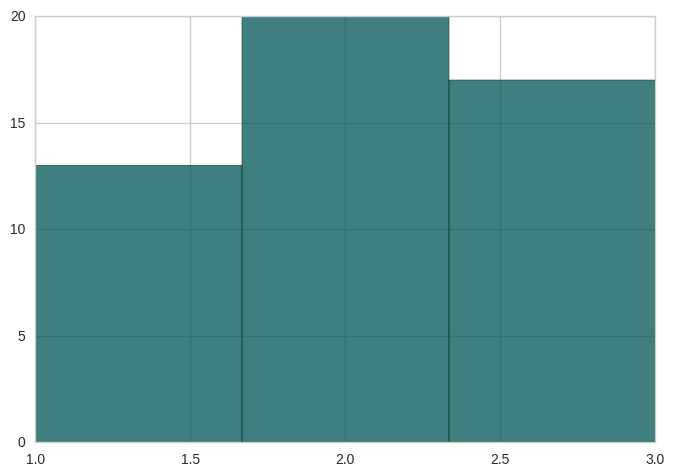

In [9]:
print(best_perf)
plt.hist(init_genomes[:,0], bins=3, alpha = 0.5, color = 'b')
plt.hist(best_genomes[:,0], bins=3, alpha = 0.5, color = 'g')
plt.show()

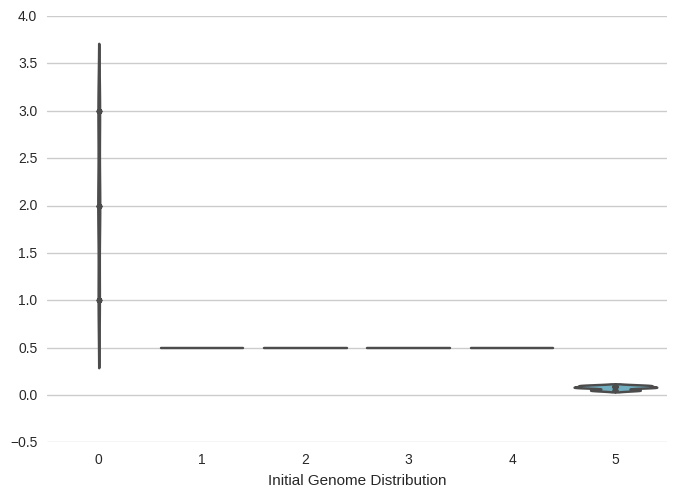

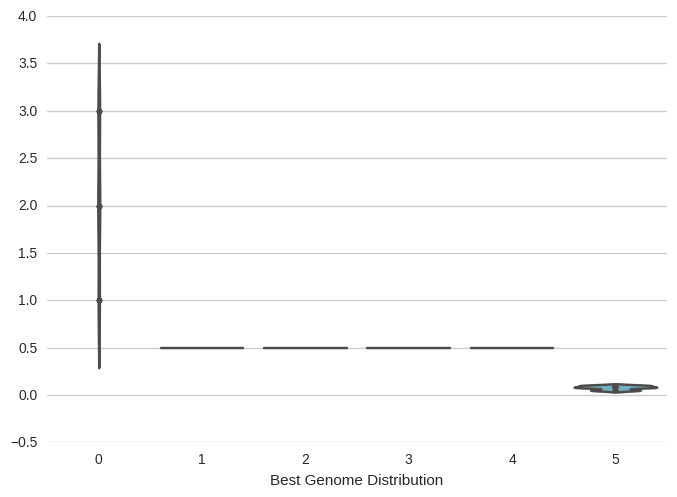

In [10]:
sns.violinplot(data=init_genomes, inner="points")
sns.despine(left=True, bottom=True)
plt.xlabel('Initial Genome Distribution')
plt.show()

sns.violinplot(data=best_genomes, inner="points")
sns.despine(left=True, bottom=True)
plt.xlabel('Best Genome Distribution')
plt.show()

print value of the parameters in different epochs

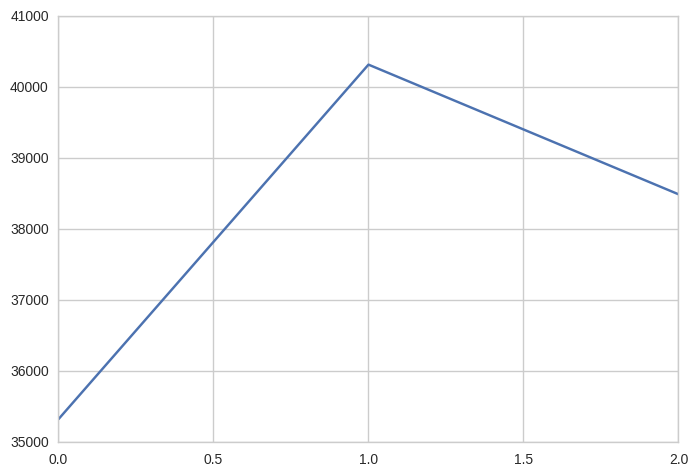

In [42]:
plt.plot(messages_over_time)
plt.show()